In [27]:
import pm4py
import pandas as pd
import conformance.main as cc
import discovery.main as discovery
import enhancement.main as enhancement
import requests
from utils.api_requests import fetch_event_log,fetch_bot_model
import json
from utils.bot.parse_lib import get_parser

In [28]:
def getBotInfo(endpoint="http://localhost:8080/SBFManager"):
    """
    Fetches the first bot from the social bot manager and returns its id and name
    """
    response = requests.get(f"{endpoint}/bots")
    if response.status_code == 200:
        data = json.loads(response.content)
        if len(data) == 0:
            return None
        first_value = list(data.values())[0]
        return first_value['id'], first_value['name']
    else:
        return None

In [29]:
bot_manager_endpoint = "https://mobsos.tech4comp.dbis.rwth-aachen.de/SBFManager"
# bot_manager_endpoint = "http://localhost:8080/SBFManager"
bot_id, bot_name = getBotInfo()
bot_name

'MensaBot'

In [31]:

# event_log_generator_endpoint = "https://mobsos.tech4comp.dbis.rwth-aachen.de/event-log"
event_log_generator_endpoint = "http://localhost:8087"

log = fetch_event_log(bot_name, event_log_generator_endpoint)
if log is None:
    raise ValueError("Event log not found")

log.head()

Fetching event log from http://localhost:8087/bot/MensaBot
Could not fetch event log, status code:  500


ValueError: Event log not found

# Discovered Model

In [ ]:
traces = pm4py.get_variants(log)
traces

{('startReview', 'quit', 'startReview'): 1,
 ('help',): 3,
 ('greeting',): 5,
 ('menu', 'getMenu', 'confirmation', 'getMenu'): 1,
 ('startReview',
  'chooseMensaAndMeal',
  'prepareReview',
  'confirmation',
  'number_selection',
  'prepareReview'): 3,
 ('menu', 'getMenu'): 7,
 ('startReview',
  'chooseMensaAndMeal',
  'prepareReview',
  'confirmation',
  'rejection'): 1,
 ('confirmation',): 5,
 ('listMensas', 'getMenu'): 1,
 ('quit',): 2,
 ('menu',
  'getMenu',
  'menu',
  'getMenu',
  'number_selection',
  'getMenu',
  'number_selection',
  'getMenu'): 1,
 ('menu', 'getMenu', 'number_selection', 'getMenu'): 2,
 ('rejection',): 1,
 ('startReview',
  'chooseMensaAndMeal',
  'prepareReview',
  'rejection',
  'confirmation',
  'chooseMensaAndMeal',
  'number_selection',
  'prepareReview',
  'prepareReview',
  'rejection',
  'confirmation',
  'chooseMensaAndMeal',
  'prepareReview',
  'confirmation',
  'number_selection',
  'prepareReview'): 1,
 ('startReview',
  'chooseMensaAndMeal',
  '

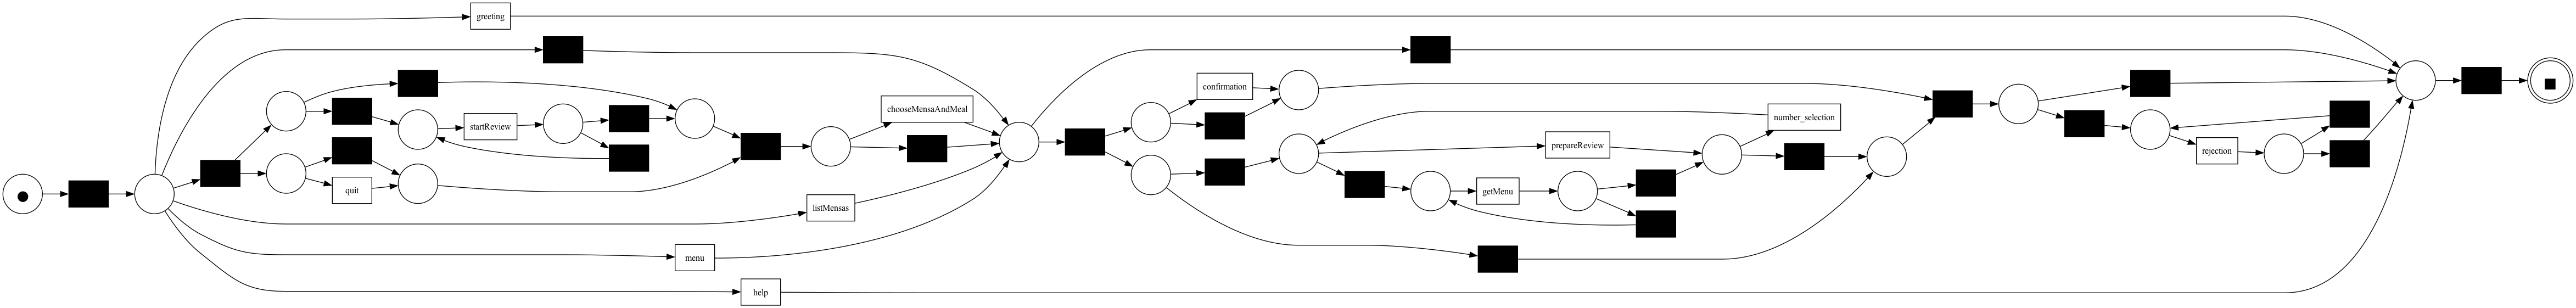

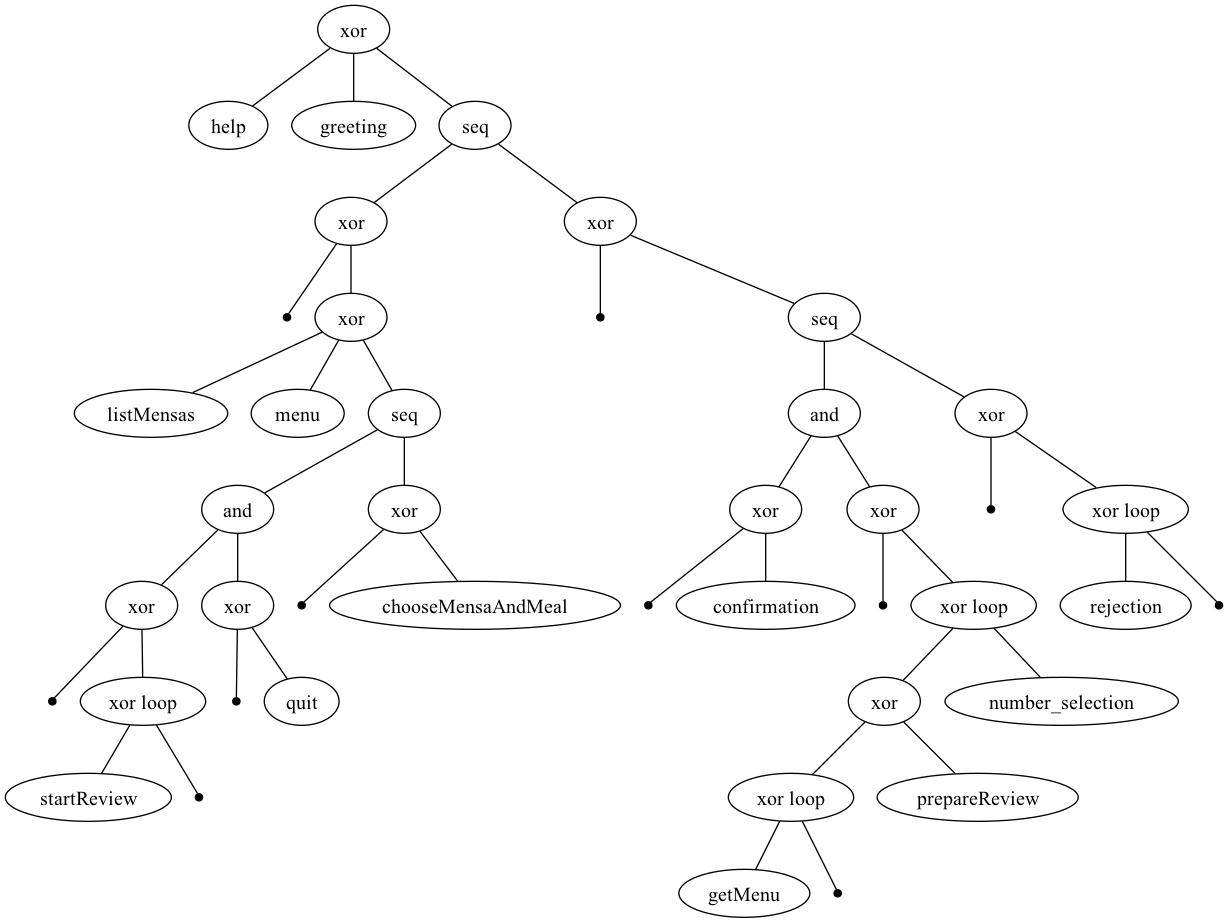

In [ ]:
log = pm4py.filter_variants_top_k(log, 10)

net,im,fm = discovery.discover_petri_net(log)
pm4py.view_petri_net(net,im,fm)
process_tree = discovery.discover_process_tree(log)
pm4py.view_process_tree(process_tree)
# bpmn = process_discovery.discover_bpmn(log)
# pm4py.view_bpmn(bpmn)

In [ ]:
traces = pm4py.get_variants(log)
traces

{('startReview', 'quit', 'startReview'): 1,
 ('help',): 3,
 ('greeting',): 5,
 ('startReview',
  'chooseMensaAndMeal',
  'prepareReview',
  'confirmation',
  'number_selection',
  'prepareReview'): 3,
 ('menu', 'getMenu'): 7,
 ('confirmation',): 5,
 ('quit',): 2,
 ('menu', 'getMenu', 'number_selection', 'getMenu'): 2,
 ('startReview',
  'chooseMensaAndMeal',
  'prepareReview',
  'rejection',
  'rejection'): 1,
 ('listMensas',
  'getMenu',
  'number_selection',
  'getMenu',
  'confirmation',
  'getMenu'): 2}

# Bot Model

Fetching bot model from https://mobsos.tech4comp.dbis.rwth-aachen.de/SBFManager/models/MensaBot


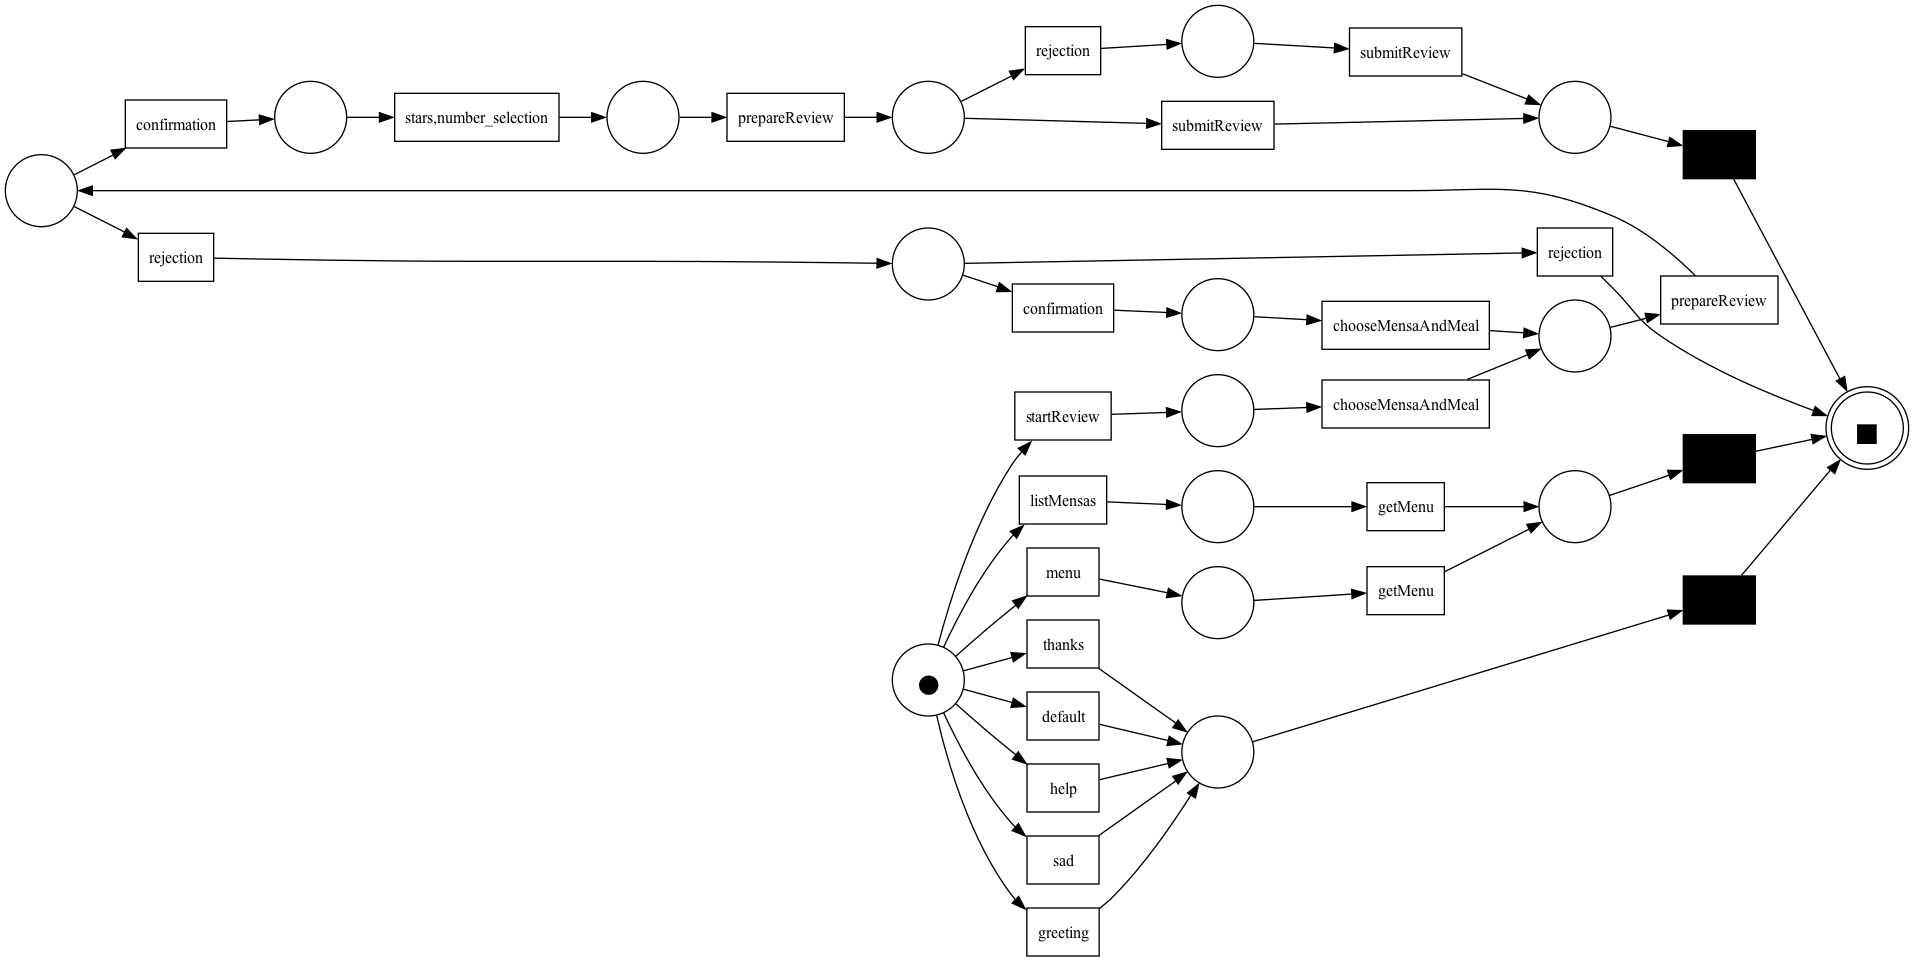

In [ ]:
model = fetch_bot_model(bot_name,bot_manager_endpoint)
bp = get_parser(model)
dfg,start_activities,end_activities = bp.get_dfg()
bot_net,bot_im,bot_fm= bp.to_petri_net()
pm4py.view_petri_net(bot_net,bot_im,bot_fm)

aligning log, completed variants :: 100%|██████████| 10/10 [00:00<00:00, 414.83it/s]


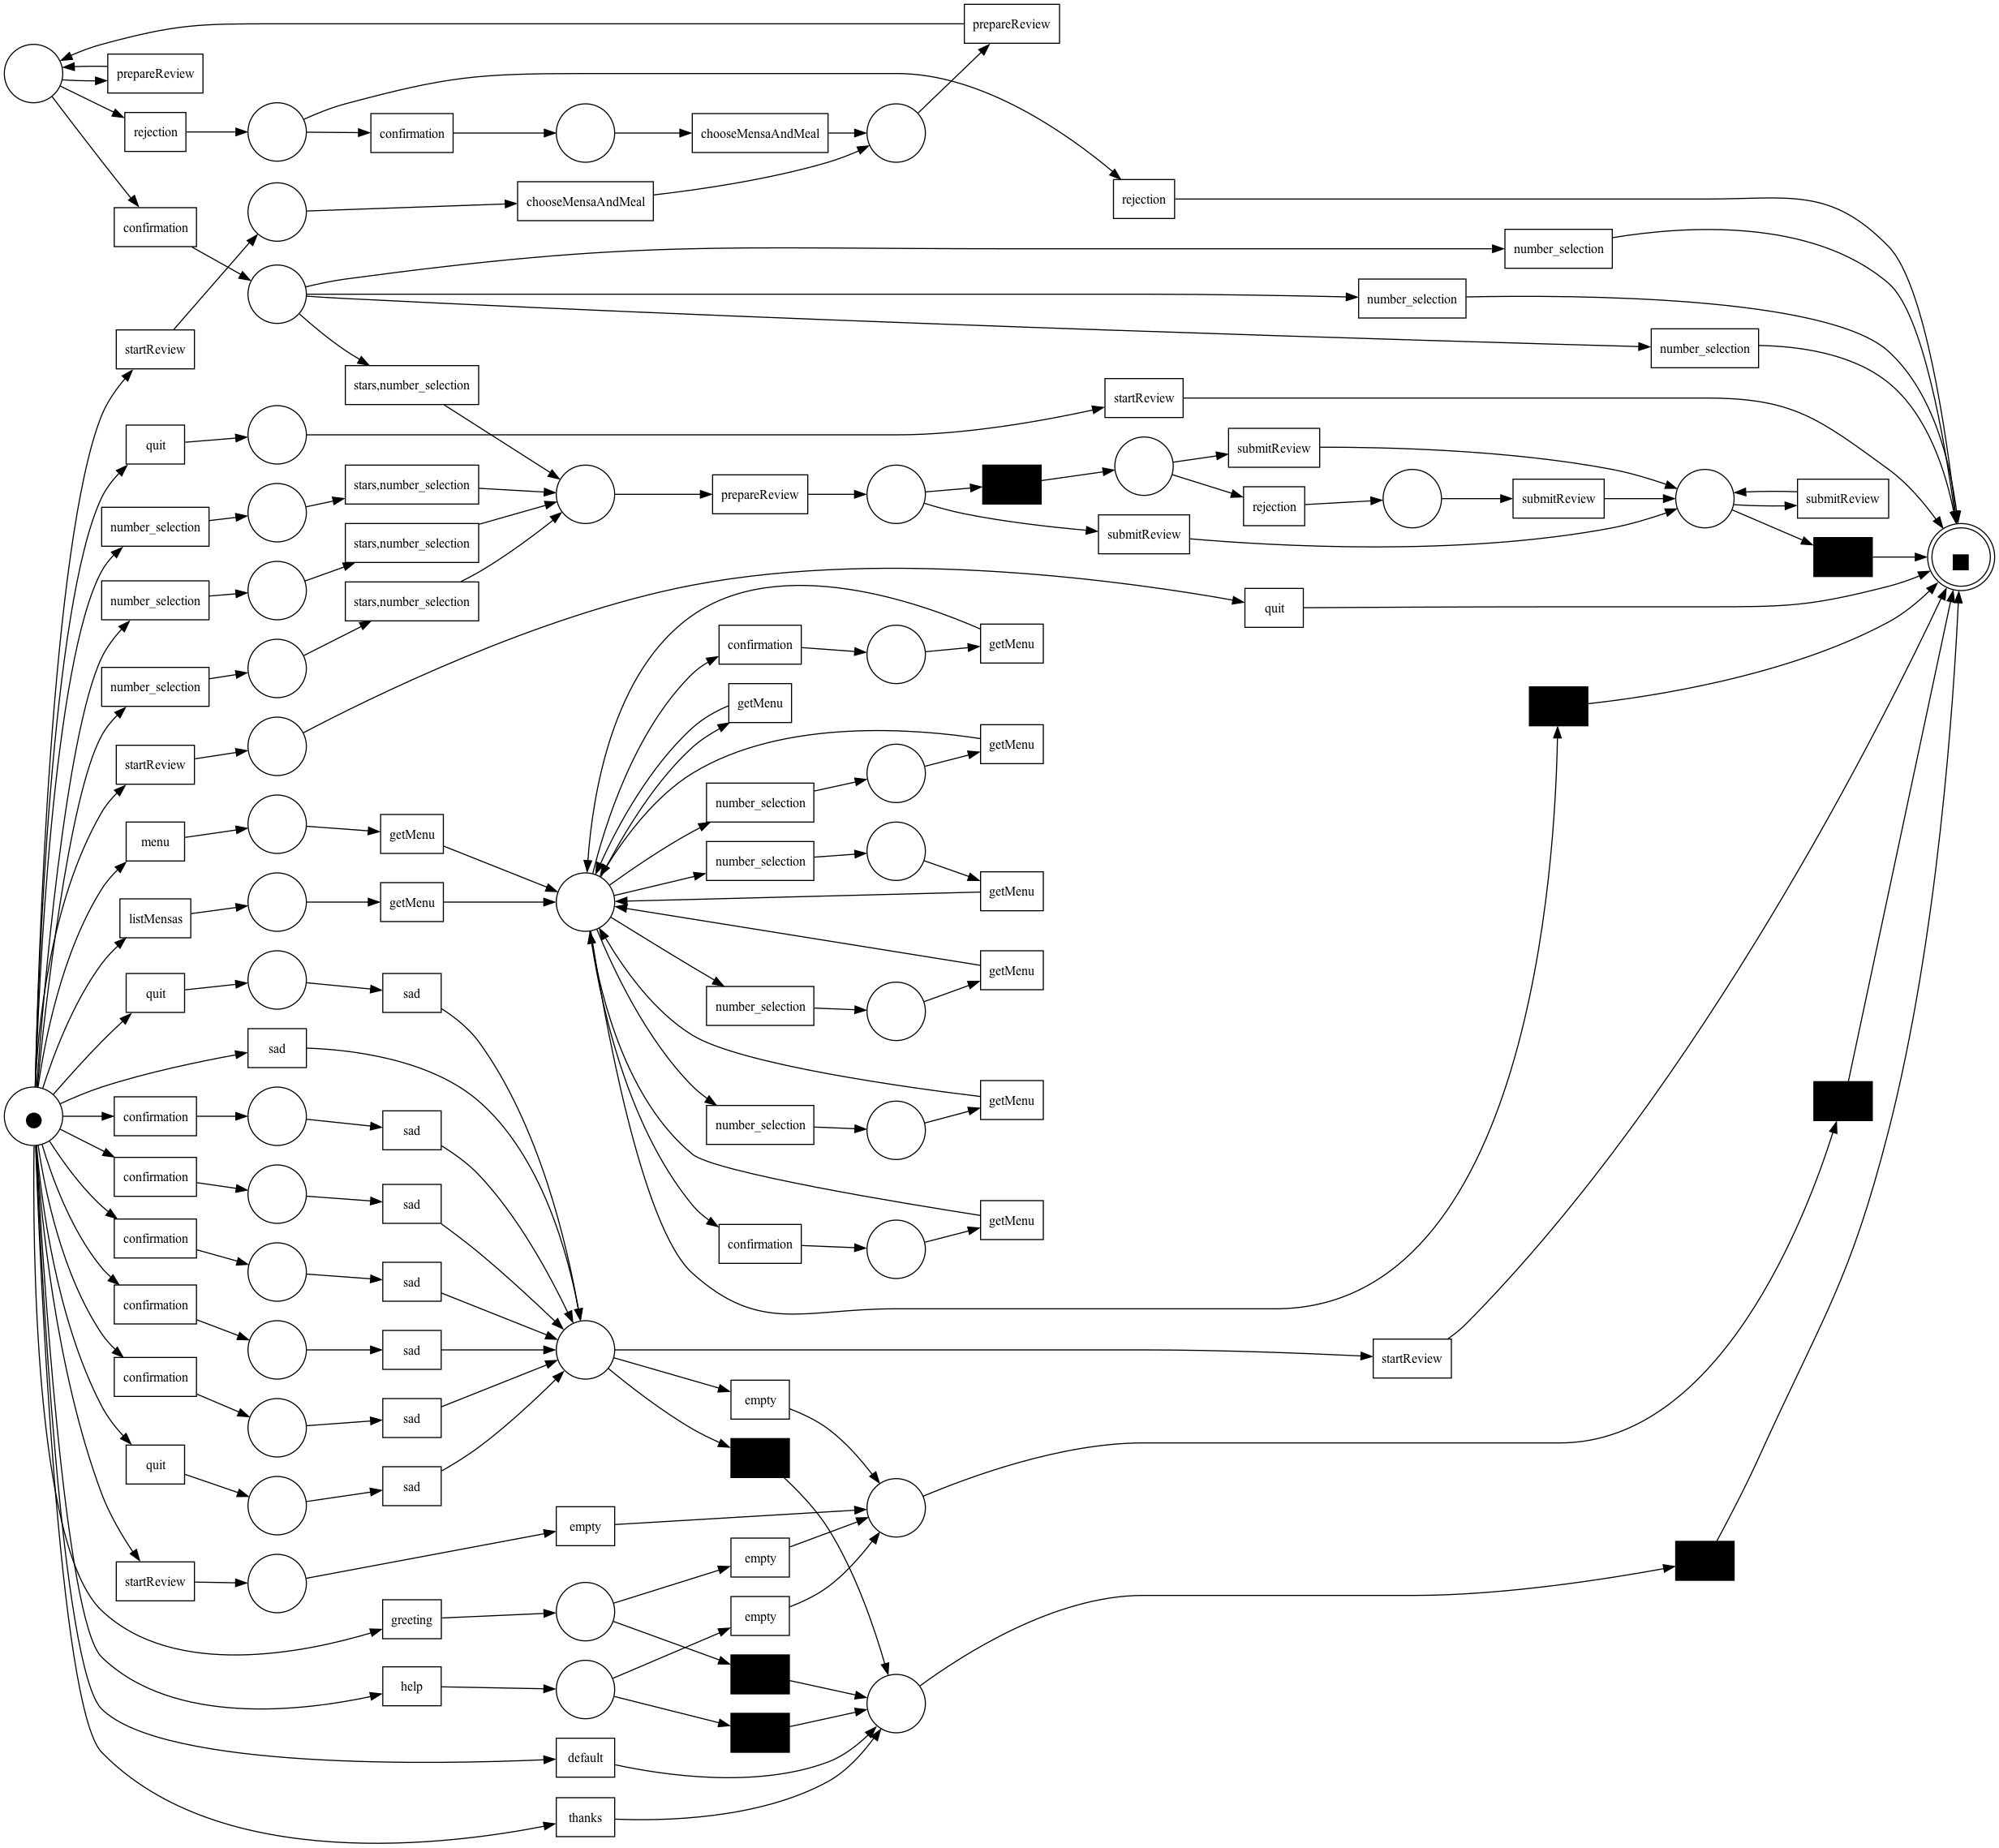

In [ ]:
enhanced_model,start_activities,end_activities,_ = enhancement.enhance_bot_model(log, bp)
bot_net,bot_im,bot_fm=bp.to_petri_net(enhanced_model,start_activities,end_activities)
pm4py.view_petri_net(bot_net,bot_im,bot_fm)